**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**July, 2023**


---

# Plots for manuscript - Figure 1 and supplementaries

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata

import seaborn as sns 

import matplotlib.pyplot as plt
import matplotlib as mpl



import gc

In [2]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1


'/opt/conda/bin/python'

In [ ]:
def identityTransfer(adata_CellsNewID, adata, field='identity'):
    
    '''
    Function to transfer the value in a .obs column, modifying only the cells included in adata_CellsNewID
    
    Parameters:
        adata_CellsNewID: anndata object with cells. These should have in their .obs[field] the new values to be transfer to adata
        adata: anndata object to modify. The value in .obs[field] will be modifies for all the cells in adata_CellsNewID
        field: column name in .obs to operate in.
        
     Return:
        anndata object with the metadata modified
        
    '''
    
    #converting categorical into strings to introduce new categories
    adata.obs[field]=adata.obs[field].astype("string")


    #assigning the new categories to the cells in adata
    for cell in adata_CellsNewID.obs.index:
        adata.obs[field][cell] = adata_CellsNewID.obs[field][cell]

    #Returning strings into categorical 
    adata.obs[field]=adata.obs[field].astype("category")
    
    return(adata)

In [ ]:
def runTF_IDF(adata, groupby, method='wilcoxon'):
    
    '''
    Function to run TF-IDF and DE analysis. TF-IDF means term-frequency times inverse document-frequency. 
    Its goal is to scale down the impact of tokens that occur very frequently (i.e. less informative)
    than features that occur in a small fraction of the training corpus.
    The the function applies a DE analysis.
    
    Parameters:
        adata: anndata object with cells.
        groupby: column name in .obs to make the DE comparison.
        method: method to use for Differential expression.
    
    Return:
        anndata object with the DE genes stored in adata.uns['rank_genes_groups']
        
    '''
    
    
    counts = anndata.AnnData(X=adata.raw.X, var=adata.raw.var, obs=adata.obs, asview=False)


    #-- Binarize counts matrix (1 if expressed, 0 otherwise)
    adata_bin = epi.pp.binarize(counts, copy=True)
    adata_bin.X.shape


    #-- Compute TF-IDF
    transformer = TfidfTransformer()
    tfidf = transformer.fit_transform(adata_bin.X.T)
    adata_bin.X = tfidf.T
    adata_bin.X.shape


    #-- Compute Mann-Withney test with scanpy
    sc.tl.rank_genes_groups(adata_bin, groupby= groupby, use_raw=False, method=method)

    return(adata_bin)

In [ ]:
def Barplot(which_var, adata, var='identity', height=3, color = False, suffix= '', fig_format='svg'):
    
    '''
    Function to plot barplots plotting the proportion of cells per catergory in var, coming from each category in which_var.
    
    Parameters:
        which_var: column name in .obs. Contains the categories to contrast.
        adata: anndata object.
        var: column name in .obs. It contains the categories of the cells.
        height: plot height
        color: colors to use
        suffix: string. Suffix to be added at the end of the name of the plot.
    
    Return:
        Saves bar plot as a pdf.
        
    '''
    
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    ax1.set_xlim(0, 100)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+ suffix+'.'+fig_format, bbox_inches='tight',
                       dpi=300, orientation='landscape', format= fig_format, optimize=True)

# Loading data

In [3]:
adata= sc.read('../../data_integration/integration_timepoints/results/rna_scVIintegrated_AllData.h5ad')

Checking that the raw counts are still there

In [ ]:
adata

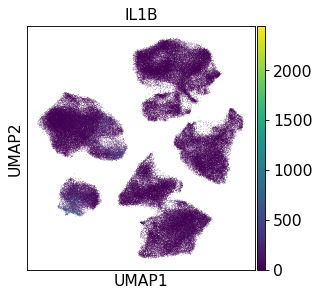

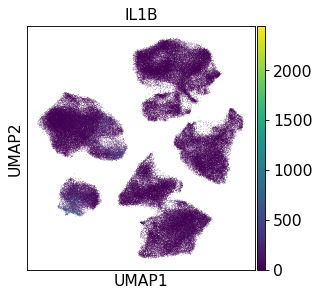

In [9]:
# use scVI imputed values for plotting
sc.pl.umap(adata, color=['IL1B' ],legend_fontsize='xx-small', layer='raw_counts')
sc.pl.umap(adata, color=['IL1B' ],legend_fontsize='xx-small',use_raw=False)

In [10]:
gc.collect()

7754

In [12]:
#temp_cells = adata[adata.obs['cell_type'].isin(['HBC'])]
adata[adata.obs['stage_perInfection'].isin(['UI_Tg_24h'])]

View of AnnData object with n_obs × n_vars = 16612 × 36601
    obs: 'sample', 'stage', 'hpi', 'infection', 'percent_mito', 'n_counts', 'sample_barcode', 'assignment_SoC', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'scrublet_doublet', 'cell_type', 'souporcell_MFgenotype', 'MFgenotype', 'cell_type_broad', 'umap_density_Tg_infected', 'stage_perInfection', 'celltype-Stage', 'Tg_intracellular', 'celltype-Intracellular', 'Dev_Stage', 'batch'
    var: 'gene_ids', 'feature_types', 'mean-0-0', 'std-0-0', 'mean-1-0', 'std-1-0', 'mean-2-0', 'std-2-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'mean-0-1', 'st

### Setting up color palette for future plots

In [4]:
sc.set_figure_params(figsize=(5,5))

In [5]:
#DF with the row names as the identity of the cells
colors_final_df = pd.DataFrame(index = np.unique(adata.obs['cell_type']))


#Assign each color per cell type under the column color

#colors_final_df.loc['SCT', 'color'] = '#f779a3'
colors_final_df.loc['VCT', 'color'] = '#b27ab4'
colors_final_df.loc['VCT_fusing', 'color'] = '#b53179'
colors_final_df.loc['VCT_p', 'color'] = '#993f98'
colors_final_df.loc['VCT_CCC', 'color'] = '#e2a7c8'

colors_final_df.loc['iEVT', 'color'] = '#0069b4'
colors_final_df.loc['EVT_1', 'color'] = '#009999'
colors_final_df.loc['EVT_2', 'color'] = '#03f9f2'


colors_final_df.loc['Endo_f', 'color'] = '#3f752d'
colors_final_df.loc['F', 'color'] = '#6bb300'
colors_final_df.loc['F_p', 'color'] = '#91A376'
colors_final_df.loc['F_sm', 'color'] = '#40C232'

colors_final_df.loc['PV', 'color'] = '#d6ff99'


colors_final_df.loc['HBC', 'color'] = '#db5669'
colors_final_df.loc['HBC_p', 'color'] = '#7d303c'
colors_final_df.loc['PAMM1', 'color'] = '#f7e55e'

colors_final_dict= colors_final_df.to_dict()['color']

In [60]:
colors_final_df

,color
EVT_1,#009999
EVT_2,#03f9f2
Endo_f,#3f752d
F,#6bb300
F_p,#91A376
F_sm,#40C232
HBC,#db5669
HBC_p,#7d303c
PAMM1,#f7e55e
PV,#d6ff99


In [61]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:03)


# Figure 1 - UMAPs

In [62]:
sc.set_figure_params(figsize=(5,5))

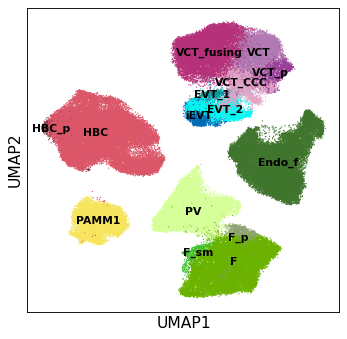

In [63]:
sc.pl.umap(adata, color=['cell_type'], size=5,
           palette= colors_final_dict, title='', legend_loc='on data',legend_fontsize='x-small',
          save='_ExpAll_scRNA.svg')

In [64]:
adata

AnnData object with n_obs × n_vars = 158978 × 36601
    obs: 'sample', 'stage', 'hpi', 'infection', 'percent_mito', 'n_counts', 'sample_barcode', 'assignment_SoC', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi', 'celltype_predictions', 'probabilities', 'scrublet_doublet', 'cell_type', 'souporcell_MFgenotype', 'MFgenotype', 'cell_type_broad', 'umap_density_Tg_infected', 'stage_perInfection', 'celltype-Stage', 'Tg_intracellular', 'celltype-Intracellular', 'Dev_Stage', 'batch'
    var: 'gene_ids', 'feature_types', 'mean-0-0', 'std-0-0', 'mean-1-0', 'std-1-0', 'mean-2-0', 'std-2-0', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'mean-0-1', 'std-0-1',

# Figure 1 - ExpAll per infection

## Plasmodium

In [65]:
temp_cells = adata[adata.obs['stage_perInfection'].isin(['Pf_24h','UI_Pf_24h'])]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [66]:
#DF with the row names as the identity of the cells
colors_df = pd.DataFrame(index = np.unique(adata.obs['cell_type']))


#Assign each color per cell type under the column color
colors_df.loc['Pf_24h', 'color'] = '#e5d400'
colors_df.loc['UI_Pf_24h', 'color'] = '#191919'


colors_dict= colors_df.to_dict()['color']

Trying to set attribute `.uns` of view, copying.


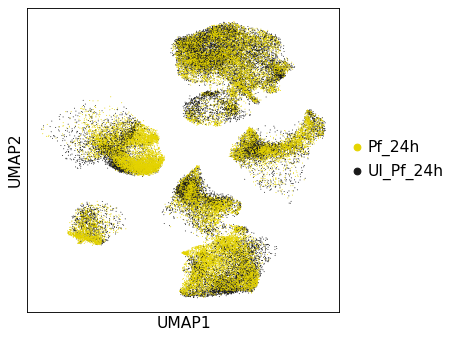

In [67]:
sc.pl.umap(temp_cells, color=['stage_perInfection'], size=3,
           palette=colors_dict, title='', legend_fontsize='medium', 
           save='_ExpAll_PfvsUI.svg')

In [68]:
gc.collect()

45588

## Listeria

In [69]:
temp_cells = adata[adata.obs['stage_perInfection'].isin(['Lm_24h','UI_Lm_24h'])]

#### Coloring only infected vs UI

In [70]:
#DF with the row names as the identity of the cells
colors_df = pd.DataFrame(index = np.unique(adata.obs['cell_type']))

#Assign each color per cell type under the column color
colors_df.loc['Lm_24h', 'color'] = '#ED55A8'
colors_df.loc['UI_Lm_24h', 'color'] = '#191919'


colors_dict= colors_df.to_dict()['color']

Trying to set attribute `.uns` of view, copying.


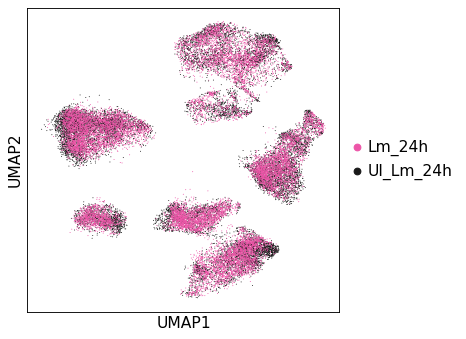

In [71]:
sc.pl.umap(temp_cells, color=['stage_perInfection'], size=3,
           palette=colors_dict, title='', legend_fontsize='medium', 
           save='_ExpAll_LmvsUI.svg')

In [72]:
gc.collect()

2592

## Toxoplasma

In [73]:
temp_cells = adata[adata.obs['stage_perInfection'].isin(['Tg_24h','UI_Tg_24h'])]

#### Coloring only infected vs UI

In [74]:
#DF with the row names as the identity of the cells
colors_df = pd.DataFrame(index = np.unique(adata.obs['cell_type']))

#Assign each color per cell type under the column color
colors_df.loc['Tg_24h', 'color'] = '#00E5E5'
colors_df.loc['UI_Tg_24h', 'color'] = '#191919'


colors_dict= colors_df.to_dict()['color']

Trying to set attribute `.uns` of view, copying.


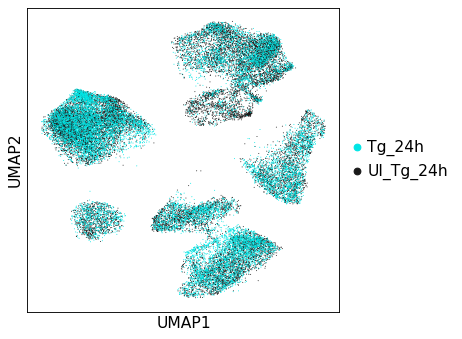

In [75]:
sc.pl.umap(temp_cells, color=['stage_perInfection'], size=3,
           palette=colors_dict, title='', legend_fontsize='medium', 
           save='_ExpAll_TgvsUI.svg')

In [38]:
del(temp_cells)
gc.collect()

28524

# Supplementary Figure S4 - scRNAseq UMAP

In [51]:
sc.set_figure_params(figsize=(5,5))

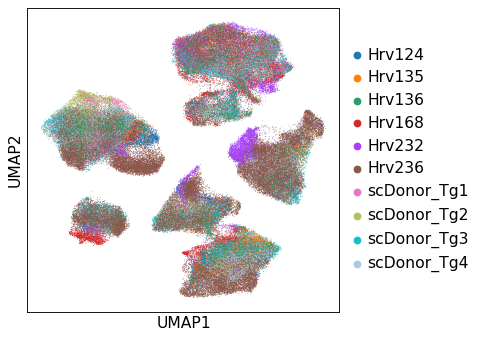

In [52]:
sc.pl.umap(adata, color=['donor_id'], size=2,
        title='', legend_fontsize='medium', 
           save='_ExpAll_donor.svg')

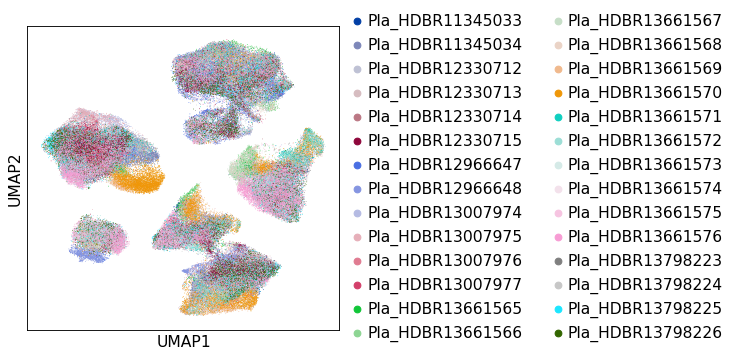

In [53]:
sc.pl.umap(adata, color=['sample'], size=2,
        title='', legend_fontsize='medium', 
           save='_ExpAll_sample.svg')

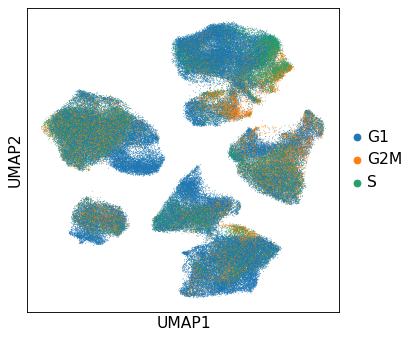

In [54]:
sc.pl.umap(adata, color=['phase'], size=2,
        title='', legend_fontsize='medium', 
           save='_ExpAll_CellCycle.svg')

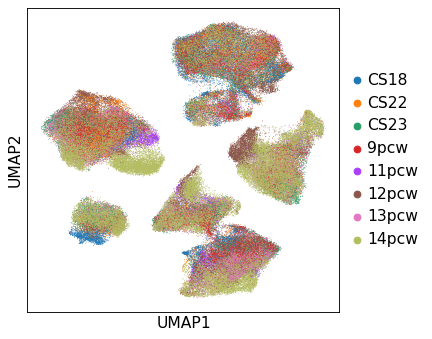

In [55]:
sc.pl.umap(adata, color=['Dev_Stage'], size=2,
        title='', legend_fontsize='medium', 
           save='_ExpAll_DevStage.svg')

### Supplementary Figures - scRNAseq UMAP: Logistic regression

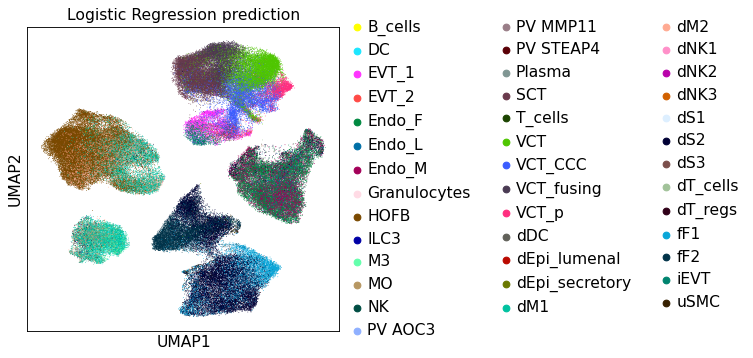

In [56]:
sc.pl.umap(adata, color=['celltype_predictions'], size=2,
        title='Logistic Regression prediction', legend_fontsize='medium', 
           save='_ExpAll_logRegPrediction.svg')

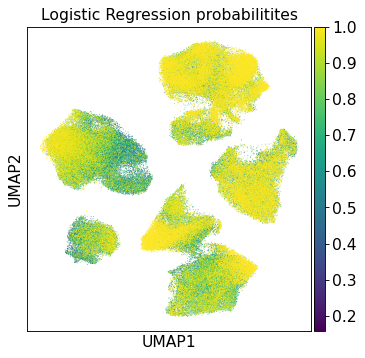

In [57]:
sc.pl.umap(adata, color=['probabilities'], size=2,
        title='Logistic Regression probabilitites', legend_fontsize='medium', 
           save='_ExpAll_probabilities.svg')

# Supplementary Figures - scRNAseq UMAP: Marker genes

In [76]:
#adata.X=adata.layers['raw_counts'].copy()
gc.collect()

2592

In [77]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:03)


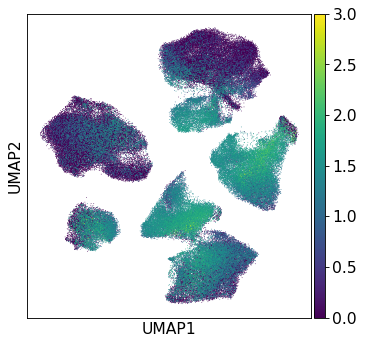

In [78]:
sc.pl.umap(adata, color=['CD9'], size=2,
        title='', legend_fontsize='medium')

In [79]:
#Dictionary with marker genes per cell type. You can substitute this for a list of genes only.
marker_genes = ['GATA2','GATA3','EGFR',
                'ERVFRD-1','ERVV-1','ERVW-1',
                'PAGE4','BCAM','TP63','CDH1',
                'MKI67',
                'ITGB6','LPCAT1',
                "HLA-G", 'CSH1',
                'ADAMTS20','ACAN','ERBB2','SERPINE2',
                'PLAC8','PAPPA',
                'DKK1','COL6A2',
                'TOP2A','ORC6',
                'OGN','TAGLN',
                'AGTR1','PDE3A','PDGFRB',
                'PECAM1','CD34',
                'CD14','FOLR2', 'LYVE1','FCGR1A',
                'TPX2', 'CENPF',
                'CD9','MGST1','MMP9']


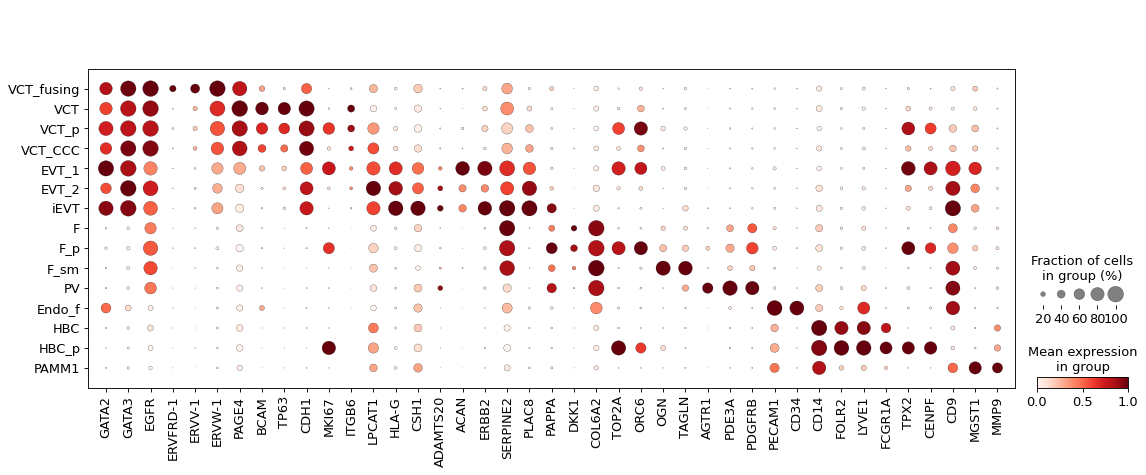

In [80]:
adata.obs['cell_type'].cat.reorder_categories(['VCT_fusing','VCT','VCT_p','VCT_CCC','EVT_1', 'EVT_2', 'iEVT',
                                               'F', 'F_p','F_sm','PV','Endo_f',  'HBC','HBC_p', 'PAMM1' ], inplace = True)


sc.pl.dotplot(adata, marker_genes, groupby='cell_type', use_raw=False, standard_scale = 'var',
             save='ExpAll_markerGenes.svg')


In [81]:
#Dictionary with marker genes per cell type. You can substitute this for a list of genes only.
marker_genes = {
    'Troph':{'GATA2','GATA3','EGFR'},
    #'SCT':{'MFSD2A','SDC1','CYP19A1'}
    'VCT-fusing': {'ERVFRD-1','ERVW-1','ERVV-1'},
    'VCT': {'CDH1','TP63','PAGE4','BCAM'},
    'VCT-P': {'MKI67'},
    'VCT-CCC': {'ITGB6','LPCAT1'},
    
    
    'EVT': {'CSH1',"HLA-G"},   
    'EVT-1': {'ACAN','ADAMTS20'},
    'EVT-2': {'SERPINE2','ERBB2'},
    'iEVT': {'PAPPA','PLAC8'},
    
    'F':{'DKK1','COL6A2','SERPINE2','DLK1'},
    'F_p':{'TOP2A','ORC6',},
    'F_sm':{'OGN','TAGLN',},
    'PV': { 'AGTR1','PDGFRB','PDE3A'},
    
    'Endo f':{'PECAM1','CD34'}, #'LYVE1'
    
    'HBC': {'FCGR1A', 'FOLR2', 'LYVE1','CD14'},
    'HBC_p': {'TPX2', 'CENPF'},
    'PAMM1':{ 'MMP9','MGST1','CD9',},#"CHI3L1" 

}

In [82]:
adata.obs['cell_type'].cat.categories

Index(['VCT_fusing', 'VCT', 'VCT_p', 'VCT_CCC', 'EVT_1', 'EVT_2', 'iEVT', 'F',
       'F_p', 'F_sm', 'PV', 'Endo_f', 'HBC', 'HBC_p', 'PAMM1'],
      dtype='object')

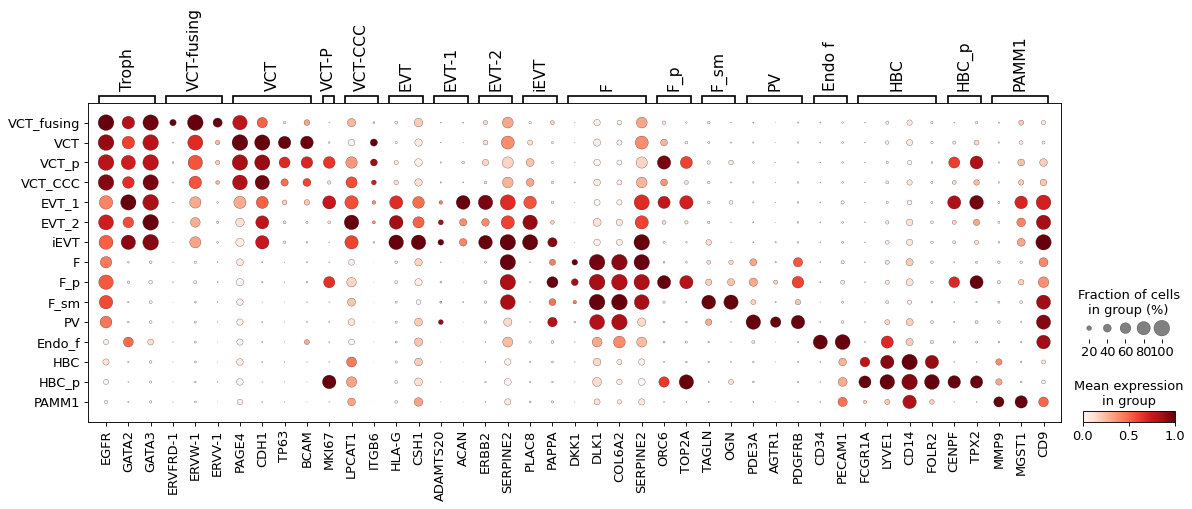

In [83]:
adata.obs['cell_type'].cat.reorder_categories(['VCT_fusing','VCT','VCT_p','VCT_CCC','EVT_1', 'EVT_2', 'iEVT',
                                               'F', 'F_p','F_sm','PV','Endo_f',  'HBC','HBC_p', 'PAMM1' ], inplace = True)


sc.pl.dotplot(adata, marker_genes, groupby='cell_type', use_raw=False, standard_scale = 'var',
             save='ExpAll_markerGenes2.svg')


# Supplementary Figure S4 - trophoblast UMAP: Host ligands for pathogens

In [32]:
#Dictionary with marker genes per cell type. You can substitute this for a list of genes only.
marker_genes = ['CDH1','MET' #Listeria
# Laminin on Toxoplasma gondii mediates parasite binding to the v1 inte- grin receptor u6v1 on human foreskin fibroblasts and Chinese hamster ovary cells.
"ITGA6","ITGB1"

# Transepithelial migration of Toxoplasma gondii involves an interaction of intercellular adhesion molecule 1 (ICAM-1) with the parasite adhesin MIC2
"ICAM1"

# https://doi.org/10.1128/iai.00205-22
"BSG"]



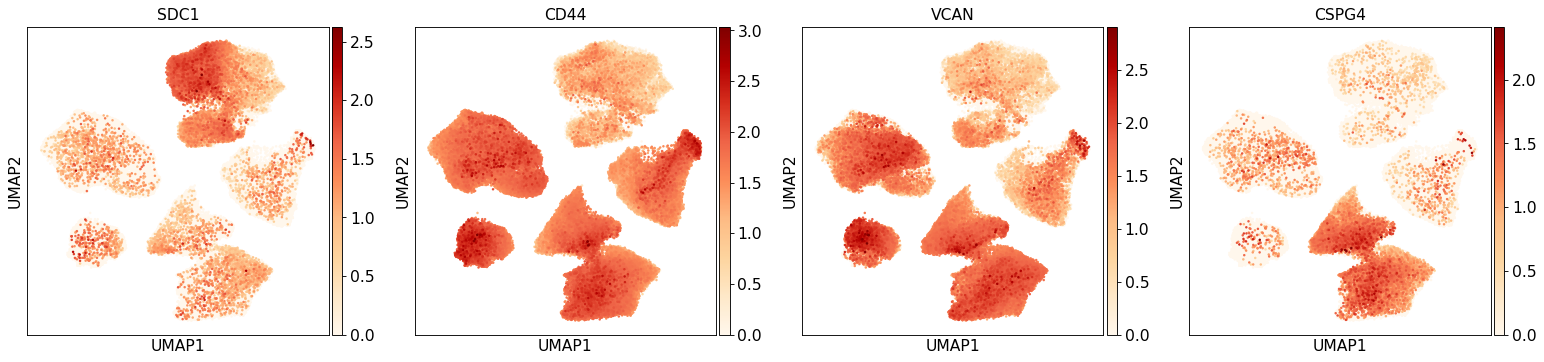

In [84]:
sc.pl.umap(adata, color=['SDC1', 'CD44','VCAN','CSPG4'], color_map='OrRd', size=20, ncols=4,
          save='scRNAseq_Pf_ReceptorGenes.svg')

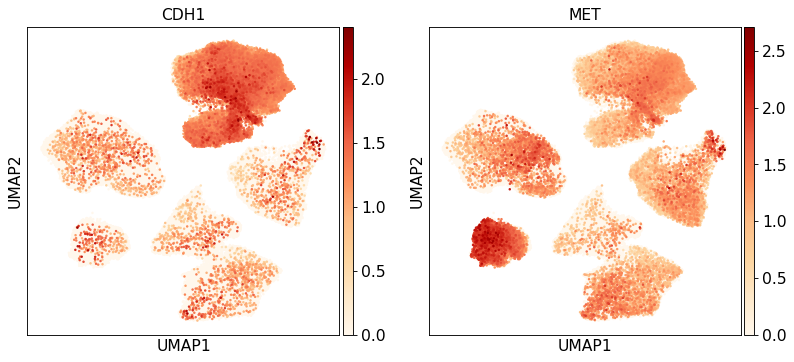

In [85]:
sc.pl.umap(adata, color=['CDH1','MET'], color_map='OrRd', size=20, ncols=4,
          save='scRNAseq_Lm_ReceptorGenes.svg')

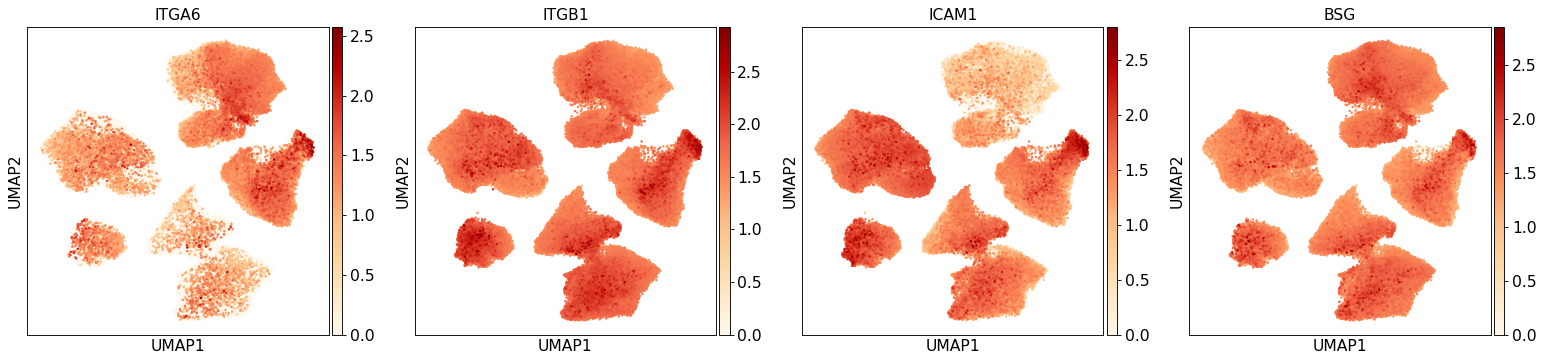

In [86]:
sc.pl.umap(adata, color=["ITGA6","ITGB1","ICAM1","BSG"], color_map='OrRd', size=20, ncols=4,
          save='scRNAseq_Tg_ReceptorGenes.svg')

---

# Supplementary Figure S7 - T. gondii counts detected

In [60]:
temp_cells = adata[adata.obs['stage_perInfection'].isin(['Tg_24h','UI_Tg_24h'])]

/opt/conda/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Trying to set attribute `.uns` of view, copying.


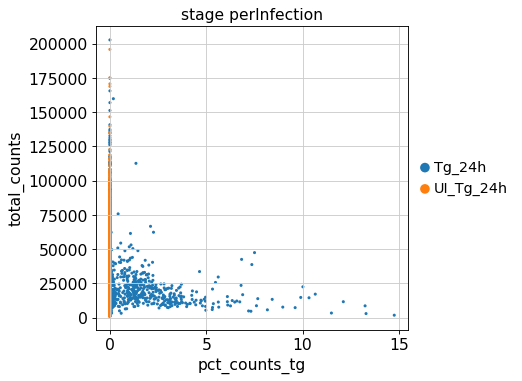

In [62]:
sc.pl.scatter(temp_cells, x='pct_counts_tg', y='total_counts', color="stage_perInfection", size=30, save='_TotalvsTg.pdf')
